# Helping Megaline Subscribers Choose the Best Plan

Megaline wants to help its customers move from old plans to newer ones: Smart or Ultra. This project uses customer data to build a model that predicts which plan fits best based on their usage. The goal was to create a model with high accuracy, with a minimum requirement of 75%. The final model was tested to ensure it works well on new data.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

## Load data

In [3]:
# Load the data files into different DataFrames
try:
    df= pd.read_csv('users_behavior.csv')
except:
    df = pd.read_csv('datasets/users_behavior.csv')

df.head()


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


## EDA

In [4]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [5]:
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

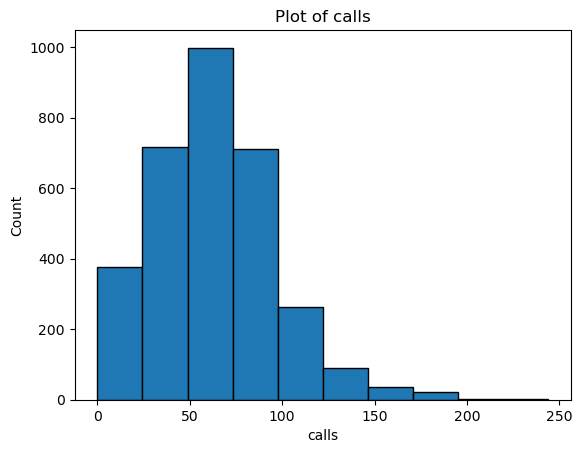

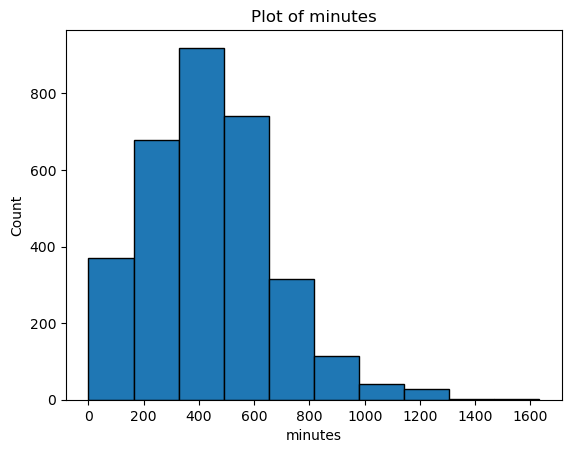

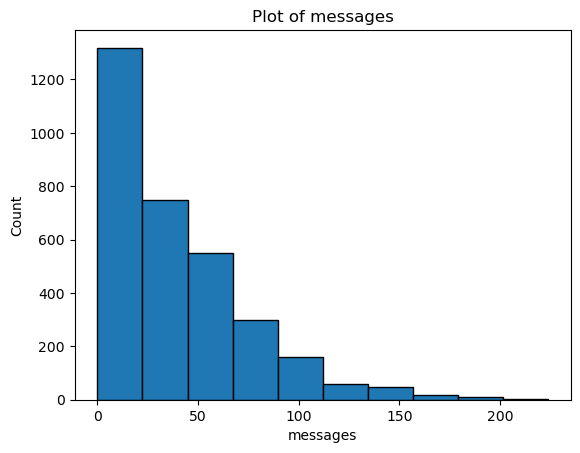

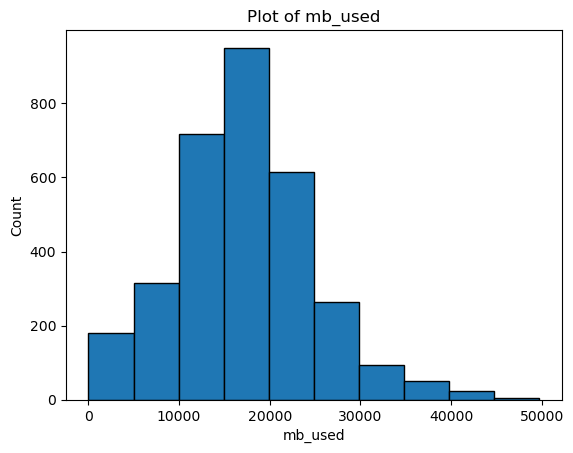

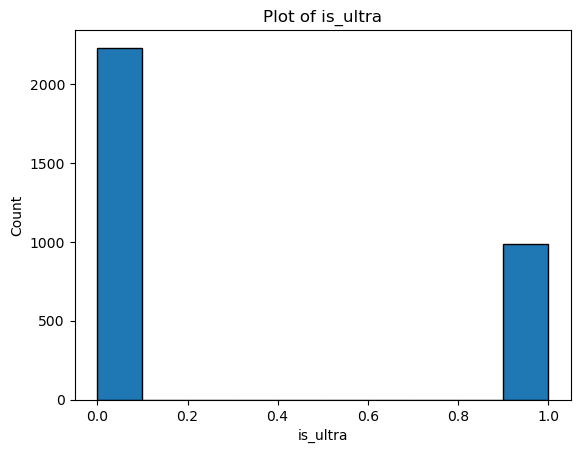

In [6]:
# Plot each column
for column in df.columns:
    plt.figure()
    plt.hist(df[column],edgecolor='black')
    plt.title(f'Plot of {column}')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.show()


## Model

### Preparing the data

In [7]:
x = df.drop('is_ultra', axis=1)
y= df['is_ultra']

In [8]:
# Splitting the data into training (60%) and temp sets (40%)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=15, stratify=y)
# Splitting the temp set into validation (20%) and test sets (20%)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=15, stratify=y_temp)

In [9]:
# Print the shape of each dataset
print("Training set shape (features):", x_train.shape)
print("Training set shape (target):", y_train.shape)
print("Validation set shape (features):", x_valid.shape)
print("Validation set shape (target):", y_valid.shape)
print("Test set shape (features):", x_test.shape)
print("Test set shape (target):", y_test.shape)


Training set shape (features): (1928, 4)
Training set shape (target): (1928,)
Validation set shape (features): (643, 4)
Validation set shape (target): (643,)
Test set shape (features): (643, 4)
Test set shape (target): (643,)


### Random Forest Classifier

In [10]:
model1= RandomForestClassifier(random_state=15).fit(x_train, y_train)
model1.score(x_valid, y_valid)

0.7978227060653188

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Perform grid search
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


### Logistic Regression

In [ ]:
model2 = LogisticRegression(random_state=15).fit(x_train, y_train)
model2.score(x_valid, y_valid)

### Decision Tree Classifier

In [ ]:
model3= DecisionTreeClassifier(random_state=15).fit(x_train, y_train)
model3.score(x_valid, y_valid)

In [ ]:
for i in range(1, 8):
    test_model= DecisionTreeClassifier(random_state=15, max_depth=i).fit(x_train, y_train)
    print(f'The accuracy score when max depth is {i}: {test_model.score(x_valid, y_valid)}')

We get best results when  max depth equals 3

### Best Model

In [ ]:
best_model1= DecisionTreeClassifier(random_state=15, max_depth=3).fit(x_train, y_train)
best_model1.score(x_test, y_test)

Decision tree was doing so good on valadition data but the reuslts on the test data is kinda low, so we would have to try the random forest 

In [ ]:
# Initialize the model with the best parameters
best_model = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=100,
    random_state=15
)

# Fit the model to the training data
best_model.fit(x_train, y_train)

# Evaluate the model on the validation set
accuracy = best_model.score(x_test, y_test)
print(f"Validation Accuracy: {accuracy}")

After trying several models, the Random Forest Classifier was the most accurate, with an 83.04% accuracy on validation data. The best settings for the model were:
- max_depth: 10
- min_samples_leaf: 1
- min_samples_split: 10
- n_estimators: 100
It performed better than Logistic Regression and Decision Tree models, making it the most reliable choice.

`Test Accuracy`: The model achieved 79% accuracy on the test data, proving it works well with unseen data.

#### DummyClassifier Performance

In [ ]:
# Initialize the DummyClassifier with the 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)

# Evaluate the model
dummy_clf.score(x_test, y_test)

The RandomForestClassifier model achieved a validation accuracy of 0.79. This is significantly higher than the DummyClassifier's accuracy of 0.69, indicating that our model is effectively learning from the data and making better predictions than random guessing.

## Conclusion

This project successfully built a model to recommend the best plan for Megaline customers. The results showed:

- The Random Forest Classifier was the best-performing model.
- The model met and exceeded the 75% accuracy goal.

With this model, Megaline can confidently suggest Smart or Ultra plans to its customers, helping them make better choices and improving their overall experience. Future improvements could include adding more customer data or testing other advanced models to increase accuracy even further.